In [5]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

SyntaxError: invalid syntax (<ipython-input-5-f338cc78b7af>, line 1)

In [192]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

city_data = "C:/Users/ADMIN/Documents/GWBootcamp_HWassignments/PyberHW/city_data.csv"
ride_data = "C:/Users/ADMIN/Documents/GWBootcamp_HWassignments/PyberHW/ride_data.csv"
cityframe = pd.read_csv(city_data)
rideframe = pd.read_csv(ride_data)

In [194]:
PortJames = cityframe['city'] == "Port James"
PortJames_twice = cityframe.loc[PortJames].reset_index()
PortJames_twice

,index,city,driver_count,type
0,84,Port James,15,Suburban
1,100,Port James,3,Suburban


In [195]:
avg_fare = rideframe[["city", "fare"]].groupby("city").mean().round(2).reset_index()
avg_fare.columns = ["City", "Fare"]

In [196]:
total_ridesbycity = rideframe[["city","ride_id"]].groupby("city").count().reset_index()
total_ridesbycity.columns = ["City", "Rides"]
total_ridesbycity.nunique()

City     125
Rides     31
dtype: int64

In [197]:
total_driversbycity = cityframe[["city","driver_count"]].groupby("city").sum().reset_index()
total_driversbycity.columns = ["City", "Drivers"]

In [52]:
city_type = cityframe[['city','type']]
city_type.columns = ["City", "Type"]

In [99]:
temp_frame = avg_fare.merge(total_ridesbycity, on="City").merge(total_driversbycity, on="City").merge(city_type, on="City")
temp_frame.shape

(126, 5)

In [61]:
urban = temp_frame['Type'] == 'Urban'
urban_data = temp_frame.loc[urban].reset_index()

In [63]:
rural = temp_frame['Type'] == "Rural"
rural_data = temp_frame.loc[rural].reset_index()

In [65]:
suburban = temp_frame['Type'] == "Suburban"
suburban_data = temp_frame.loc[suburban].reset_index()

In [ ]:
# TotalRides = temp_frame['Total Rides'].tolist()
# TotalDrivers = temp_frame['Total Drivers'].tolist()
# Avg_Fare = temp_frame['Average Fare'].tolist()

plt.title('Bubble Plot')
plt.xlabel('Total Drivers')
plt.ylabel('Total Rides')
#plt.scatter(TotalRides, TotalDrivers, Avg_Fare, marker="o", facecolors="", edgecolors="black")

In [222]:
#Urban Data
ux, uy, uz = urban_data["Drivers"].tolist(), urban_data["Rides"].tolist(), urban_data["Fare"].tolist() 
#Rural Data
rx, ry, rz = rural_data["Drivers"].tolist(), rural_data["Rides"].tolist(), rural_data["Fare"].tolist()
#Suburban Data
sx, sy, sz = suburban_data["Drivers"].tolist(), suburban_data["Rides"].tolist(), suburban_data["Fare"].tolist()

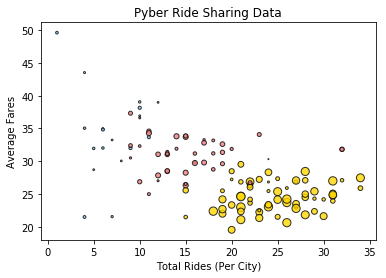

In [227]:
plt.scatter(uy, uz, facecolors="gold", edgecolors="black", linewidth=1, marker='o', s=ux, alpha=0.8)
plt.scatter(ry, rz, facecolors="lightSkyBlue", edgecolors="black", linewidth=1, marker='o', s=rx, alpha=0.8)
plt.scatter(sy, sz, facecolors="lightCoral", edgecolors="black", linewidth=1, marker='o', s=sx, alpha=0.8)
#plt.scatter(TotalRides, TotalDrivers, Avg_Fare, marker="o", facecolors="", edgecolors="black")
plt.title('Pyber Ride Sharing Data')
plt.xlabel("Total Rides (Per City)")
plt.ylabel('Average Fares')
plt.legend()
#plt.scatter(marker="o", facecolors="", edgecolors="black")
plt.show()

In [155]:
#I have to merge the city and ride data into one, merging on the city
Total_faresByCity = cityframe.merge(rideframe, on='city')

total_fares = Total_faresByCity[["type", "fare"]].groupby("type").sum().round(2).reset_index()
total_fares

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [161]:
Total_rideByCity = rideframe.merge(cityframe, on='city')

total_rides = Total_rideByCity[["type", "ride_id"]].groupby("type").count().reset_index()
total_rides

,type,ride_id
0,Rural,125
1,Suburban,657
2,Urban,1625


In [177]:
Total_driversByCity = cityframe.merge(rideframe, on='city')

total_drivers = Total_driversByCity[["type", "driver_count"]].groupby("type").sum().round(2).reset_index()
total_drivers

,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


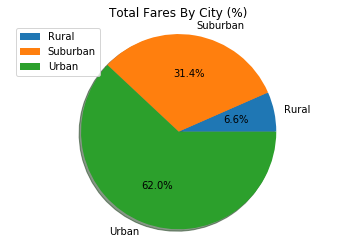

In [185]:
total_fare_chart = total_fares['fare']
labels='Rural', 'Suburban', 'Urban'
plt.pie(total_fare_chart, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Fares By City (%)')
plt.legend()
plt.show()

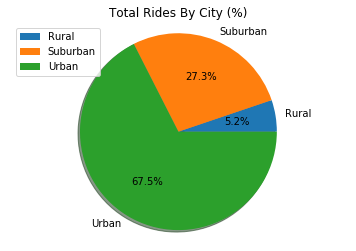

In [184]:
total_ride_chart = total_rides['ride_id']
labels='Rural', 'Suburban', 'Urban'
plt.pie(total_ride_chart, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Rides By City (%)')
plt.legend()
plt.show()

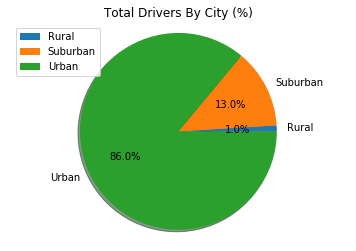

In [186]:
total_drivers_chart = total_drivers['driver_count']
labels='Rural', 'Suburban', 'Urban'
plt.pie(total_drivers_chart, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Total Drivers By City (%)')
plt.legend()
plt.show()